### General Feature Extraction
- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts

In [1]:
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

c:\Users\poseidon\anaconda\envs\NLP\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# File loading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding = 'latin1')

df.head(3)

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0


# Feature extraction

## Word Counts

In [3]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

## Characters Count

In [4]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)
    
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

## Average Word Length

In [5]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

## Stop Words Count 

In [6]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

## Count #HashTags and @Mentions 

In [7]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [8]:
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

## If numeric digits are present in twitts

In [9]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

## UPPER case words count 

In [11]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

## Extracted features

In [12]:
df.head(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,is bored and wants to watch a movie any sugge...,0,10,43,4.300000,5,0,0,0,0
1,back in miami. waiting to unboard ship,0,7,32,4.571429,3,0,0,0,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,54,4.500000,0,0,1,0,1


c:\Users\poseidon\anaconda\envs\NLP\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


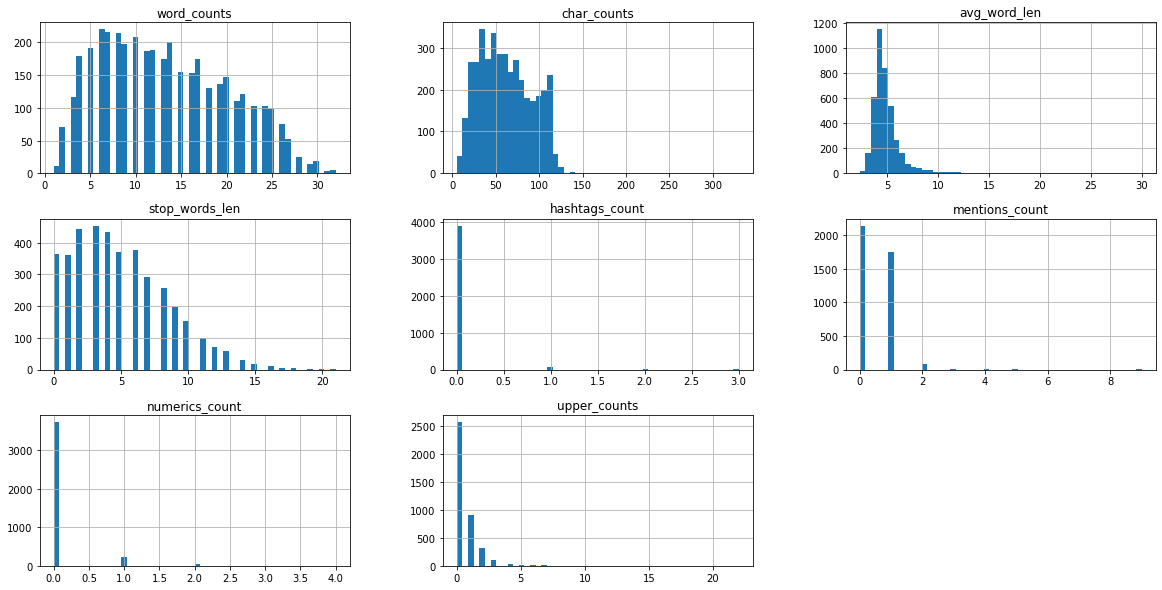

In [13]:
df.iloc[:,2:].hist(figsize=(20,10), bins=50);